In [1]:
import pandas as pd

In [2]:
from pandas import read_csv
from datetime import datetime


def parse(x):
    return datetime.strptime(x, '%d%b%Y').strftime('%Y %m %d')


dataset = read_csv('gasoline.csv', parse_dates=['date'],
                   index_col=0, date_parser=parse)

/usr/local/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
dataset.drop(['mts_id', 'intid', 'marke', 'year', 'month', 'day', 'vehicles1',
              'latitudezst', 'longitudezst', 'brentl', 'd1', 'zst1'],
             axis=1, inplace=True)

# test = dataset['marke'][~dataset['marke'].isnull()][:1000]
# .str.lower().value_counts().shape

In [4]:
# pd.get_dummies(test.str.lower())
# dataset.drop(['marke'], axis=1, inplace=True)
# dataset.keys()

In [5]:
# th = dataset[:1000]
# th.set_index('date', inplace=True)
dataset.set_index('date', inplace=True)

In [6]:
# # need to find global mean of gas on each day
# global_mean = th.groupby('date')['e5gas'].mean()
# # if the dates match, that value is the value for 'global_mean'
# # pd.concat([th, global_mean], keys='date', axis=1)
# df = global_mean.to_frame()
# df.rename(columns={"e5gas": "global_mean"}, inplace=True)
# sp = pd.merge(th, df, left_index=True, right_index=True)

global_mean = dataset.groupby('date')['e5gas'].mean()
df = global_mean.to_frame()
df.rename(columns={"e5gas": "global_mean"}, inplace=True)
sp = pd.merge(dataset, df, left_index=True, right_index=True)

In [7]:
sp.keys()
print(sp.shape)
sp.dropna(inplace=True)
print(sp.shape)

(8270468, 17)
(8162756, 17)


In [8]:
# magic command to display matplotlib plots inline within the ipython notebook
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [9]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

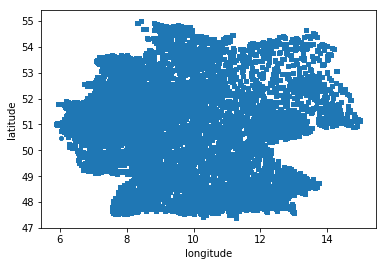

In [10]:
# scatterplot it to get a sense of what it looks like
df = sp.sort_values(by=['latitude', 'longitude'])
ax = df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, linewidth=0)

In [11]:
# represent points consistently as (lat, lon)
coords = df.as_matrix(columns=['latitude', 'longitude'])

# define epsilon as 10 kilometers, converted to radians for use by haversine
epsilon = 10 / kms_per_radian

In [ ]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
unique_labels = set(cluster_labels)

# get the number of clusters
num_clusters = len(set(cluster_labels))

In [ ]:

# get colors and plot all the points, color-coded by cluster (or gray if not in any cluster, aka noise)
fig, ax = plt.subplots()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# for each cluster label and color, plot the cluster's points
for cluster_label, color in zip(unique_labels, colors):
    
    size = 150
    if cluster_label == -1: #make the noise (which is labeled -1) appear as smaller gray points
        color = 'gray'
        size = 30
    
    # plot the points that match the current cluster label
    x_coords = coords[cluster_labels==cluster_label][:,1]
    y_coords = coords[cluster_labels==cluster_label][:,0]
    ax.scatter(x=x_coords, y=y_coords, c=color, edgecolor='k', s=size, alpha=0.5)

ax.set_title('Number of clusters: {}'.format(num_clusters))
plt.show()